## Simulación
## Unidad 3
## Problema 1: Distribución Binomial 

Contexto: Un distribuidor de artículos electrónicos recibe varios pedidos diarios. Cada día, el distribuidor tiene una probabilidad de écito de cumplir un pedido (es decir, de tener en stock los artículos solicitados) del 70%.
Desea simular la cantidad de pedidos diarios que logra satisfacer para gestionar adecuadamente sus inventarios y minimizar las faltantes de stock.
Objetivo: Generar una variable aleaotiroa que simule el número de pedidos satisfechos por día durante una semana, considerando que cada día el distribuidor recibe 20 pedidos.

### Docente: José Gabriel Rodríguez Rivas
### Alumno: Emanuel Magallanes Contreraspedidos.

Número de pedidos satisfechos por día en la semana:
[15, 15, 15, 16, 10, 16, 13]


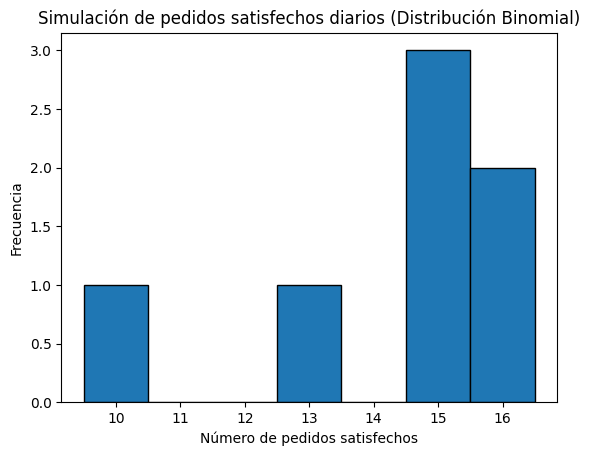

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros de la distribución binomial
n = 20   # Número de pedidos diarios
p = 0.70 # Probabilidad de satisfacer un pedido

# Número de simulaciones (días de una semana)
num_simulaciones = 7
U = np.random.uniform(0, 1, num_simulaciones)

# Función de distribución de probabilidad (PMF) de la distribución binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

# Método de Transformada Inversa para la distribución binomial
def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de pedidos satisfechos
        k += 1

# Generar la cantidad de pedidos satisfechos en cada día de la semana
pedidos_satisfechos = [binomial_inverse_transform(n, p, u) for u in U]

# Mostrar resultados
print("Número de pedidos satisfechos por día en la semana:")
print(pedidos_satisfechos)

# Graficar los resultados
plt.hist(pedidos_satisfechos, bins=np.arange(min(pedidos_satisfechos), max(pedidos_satisfechos) + 2) - 0.5, edgecolor='black')
plt.title("Simulación de pedidos satisfechos diarios (Distribución Binomial)")
plt.xlabel("Número de pedidos satisfechos")
plt.ylabel("Frecuencia")
plt.xticks(range(min(pedidos_satisfechos), max(pedidos_satisfechos) + 1))
plt.show()